##![leas3_title_1.png](http://bitbucket.org/repo/BpoAoj/images/1604076943-leas3_title_1.png)

` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` ` [Wiki Home](Home) ` ` ` ` ` ` ` ` ` ` ` ` ` ` [Tutorial [2/3] >](Lea3_Tutorial_2)

**Table of Content**

[TOC]

---

# Introduction 

The present tutorial explains how to use the Lea 3 package, through a sequence of simple examples executed in the Python console.




## What is Lea?

Lea is a Python library for dealing with discrete probability distributions in a simple way.

Lea allows you modeling a broad range of random phenomena, like gambling, weather, finance, etc. It lets you define random variables with given probability distributions on any Python object; then, these random variables can be combined together using usual arithmetic, comparison, logical operators, joints, conditional probability and even user-defined functions. Lea can then calculate the probability distributions on these derived random variables; it provides also usual probability indicators (e.g. the mean and the variance) and measures from information theory (e.g. the entropy). Generation of random samples can be performed on any probability distribution, even non-uniform. Advanced functions let you build up probabilistic models using joint probability distributions (JPD), conditional probability tables (CPT), Bayes networks and Markov chains. Lea is definitely a toolkit for _probabilistic 
programming_. 

Lea is designed to be easy to use, putting the focus on the expressiveness of the models and hiding as much as possible the underlying mathematics. It can be used as a toolkit for teaching probability theory and probabilistic programming.

Lea, as of version 3, offers different ways to represent probabilities, including floating-point numbers, fractions and even symbolic variables (thanks to [SymPy](http://www.sympy.org) library). You can easily switch from one representation to another. Whatever the probability representation, the same calculation algorithm is used, producing results with the probability type you've chosen.

The probability calculation in Lea is performed through an original algorithm, the _Statues algorithm_, which is based on generators and variable binding. This algorithm performs _exact calculation_. The implementation has been tuned to optimize the CPU. However, should the combinatorial become prohibitively large, an approximate algorithm based on Monte-Carlo sampling is also available.

Lea is a _pure Python_ library. Most of the functions do not require installation of other packages. For advanced functions however, you may take advantage of the following optional libraries (these are automatically detected and integrated when you use Lea): [matplotlib](http://matplotlib.org) for plotting histograms, [SymPy](http://www.sympy.org) for symbolic calculations and [pandas](http://pandas.pydata.org) for building joint probability distributions. Note that these three libraries are part of the [Anaconda distribution](http://www.anaconda.com); so, if you install Lea within your Anaconda environment, then you have access to all Lea features without worrying about installation.

Lea runs on Python 2.6, 2.7 or 3.x.

Lea is available under LGPL license.





## Prerequisites

Lea 3 is the baseline for the present tutorial.
If you are Lea 2 user, please read the [Lea 3 vs Lea 2](#markdown-header-lea-3-vs-lea-2) section.

In order to execute the statements given in the present tutorial, you need

* [Python](http://www.python.org/downloads) 2.6+ or 3.x - see [download page](http://www.python.org/downloads)
* Lea 3 module installed - see  [Lea installation page](Installation).

Lea is a pure Python module. For most of the functions, there are no other module to install.
As already explained [above](#markdown-header-what-is-lea), you may optionally install  [matplotlib](http://matplotlib.org), [SymPy](http://www.sympy.org) and [pandas](http://pandas.pydata.org) to have access to a couple advanced features. These libraries can be installed at any time, independently each from each other, without reinstalling Lea. 
 
Also, as Python itself, you can use Lea on Linux, Mac OS X, Windows and more.





## How to use this tutorial?

_Note: you can skip this section if you are already experienced in Python!_




### REPL mode

The best way to learn Lea is to use it interactively, through the [REPL mode ("Readâ€“evalâ€“print loop)](https://en.wikipedia.org/wiki/Read%E2%80%93eval%E2%80%93print_loop). You start a Python console and type the following statement:




In [0]:
>>> import lea



where `>>>` is just the the Python prompt. From here, all the examples provided in the present tutorial can be executed. What follow the `>>>` prompt are the Python statements or expressions that _you_ type; then, on the line(s) below, the result of the execution are displayed (if any).

See this as your new probability pocket calculator!




### Program mode

When you are confident with Lea and you are willing to make more serious things, all you have to do is importing `lea` module in your program. In such case, when you need to display results, you just have to pass the Lea instances and expressions to the standard `print(â€¦)` function (using `print` not necessary in the REPL mode, hence omitted in the following).





In [1]:
!pip install lea

     |████████████████████████████████| 81kB 4.5MB/s 
  Created wheel for lea: filename=lea-3.2.0-cp36-none-any.whl size=107122 sha256=e893924303009451a0330d6c4c5d64ec5f9cfddf5d61f0f75322db07d68c48aa
  Stored in directory: /root/.cache/pip/wheels/31/0a/4a/d6de3748b29f6b56e953d7168b70ff4428c9713d1907952290
Successfully built lea


### Hints and tips

When you are used to Lea functions, you could also use the alternative form:



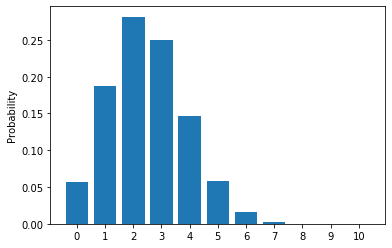

In [17]:
binom(10,0.25).plot()



and then, you can _omit the `lea.` prefix in all the examples!_ This is actually a handy feature of Python. The first variant has been preferred however in the present tutorial, so you can clearly distinguish Lea functions from Python builtin functions.

Should you want to follow the present tutorial using probability displayed as _fractions_ instead of floating-point numbers - or should you be an experienced Lea 2 user -, then simply execute the following statement, once for all:



In [0]:
>>> lea.set_prob_type('r')



and enter the probabilities as fraction strings (e.g. `'1/4'`). More details on this topic are given in the [section "Changing probability representation"](Lea3_Tutorial_2#markdown-header-changing-probability-representation).


# Defining discrete probability distributions

The first thing to do when working with Lea is to define a probability distribution that models a given phenomenon. In Lea, probability distributions are discrete and finite; internally, any probability distribution _X_ is defined by a collection of associations _v_ : P(X=_v_), which defines for any possible value _v_ of _X_, the probability that _X=v_. Such collection is named a probability mass function or, for short, a _pmf_. So, in Lea, defining a probability distribution means defining a pmf.

There are essentially three ways to define such pmf:

* providing a collection of values assumed to be equiprobable,
* providing an explicit pmf,
* using predefined standard functions (binomial, poisson, etc.).

Whatever the chosen method, the result is a new probability distribution, defined by a probability mass function associating each possible value to the probability that it occurs.

We explain hereafter how these 3 approaches can be followed in Lea.




## Definition by values (`vals`, `interval` functions)

The simplest way to define a Lea distribution is by providing a collection of values. The `vals(â€¦)` function does that job. As an example, the following statement defines the result of coin flipping, assuming fair chances to get head or tail:



In [0]:
>>> flip = lea.vals('Head','Tail')



If each value occurs exactly once in the given arguments, then you get a uniform probability distribution: each value has the same occurrence probability, which is 1/_N_ where _N_ is the number of given values. If some values occur multiple times in the given argument, then the associated probability of a given value is its frequency (see below).

*Note: All functions presented here are documented in the [Lea 3 API page](http://drive.google.com/file/d/13ROrVkjbRRESTl2KF-xXRrKsikQAm_Eg/view?usp=sharing). Note that you must download the HTML file and open it afterward (no online rendering!).*

The pmf distribution can be displayed simply by entering its name. This displays the different values, in sorted order, with their respective probabilities:



In [0]:
>>> flip
Head : 0.5
Tail : 0.5



If you use Lea in a script instead of the interactive console, then youâ€™ll have simply to use the `print` function to get the same output:



In [0]:
print (flip)



Note that Lea fully complies with the axioms of probability: each displayed probability is between 0 and 1, the total of probabilities displayed for a given distribution is equal to 1 (or, due to rounding errors, something very close to 1).

If the same value occurs several times in the arguments, then its probability of this value is proportional to its number of occurrences. For instance, an unfair coin can be defined by the following statement:



In [0]:
>>> biased_flip = lea.vals('Head','Tail','Tail')



Since the value 'Tail' is provided twice, it has two more chances to occur than 'Head', which occurs only once:



In [0]:
>>> biased_flip
Head : 0.3333333333333333
Tail : 0.6666666666666666



We will show later in this tutorial that this feature of repeated values shall prove handy for determining frequencies of values in a given sample.

You can associate probabilities to Python objects of any type, provided that it is _hashable_ (which is the case for most Python types). Consider for example a fair die with six faces. It is natural to model this die with integers from 1 to 6:



In [0]:
>>> die = lea.vals(1,2,3,4,5,6)
>>> die
1 : 0.16666666666666666
2 : 0.16666666666666666
3 : 0.16666666666666666
4 : 0.16666666666666666
5 : 0.16666666666666666
6 : 0.16666666666666666



If you have already prepared a collection of values (i.e. something _iterable_ like Python's tuple, list, set, iterator, range, â€¦), then you have simply to add an asterisk to expand the arguments. For example, the following statements are equivalent and create the same die distribution as above:



In [0]:
>>> my_tuple = (1,2,3,4,5,6)
>>> die = lea.vals(*my_tuple)
>>> die = lea.vals(*range(1,7))



or, using Python's list comprehension / generator expressions,



In [0]:
>>> die = lea.vals(*[v+1 for v in range(6)])
>>> die = lea.vals(*(6-v for v in range(6)))



You can see on the last example that, whatever the order in the definition, the values displayed are automatically sorted. To prevent this behavior and keep the values in the order you want, use the `ordered` keyword argument:



In [0]:
lea.vals(1,6,2,5,3,4,ordered=True)
1 : 0.16666666666666666
6 : 0.16666666666666666
2 : 0.16666666666666666
5 : 0.16666666666666666
3 : 0.16666666666666666
4 : 0.16666666666666666



Note that this `ordered=True` option just affects the display, not the mathematical meaning of the probability definition. Note also that this option requires that all given values occur only once (otherwise, an exception is raised).

For the specific case of sequences of equiprobable integers, which is typical for dice, Lea provides a convenience method, `interval(a,b)`. It generates integers from `a` to `b` inclusive:



In [0]:
>>> die = lea.interval(1,6)



To retrieve the probability of a given value `v`, use the `p(v)` method.



In [0]:
>>> biased_flip.p('Head')
0.3333333333333333
>>> die.p(5) 
0.16666666666666666



The returned value is a regular float number, between 0 and 1, which you can then use in other calculations if needed. We'll see soon more powerful techniques to calculate probabilities from your distributions.





## Definition by probability mass function (`pmf` function)

Another way to define Lea distributions, which is the most general, is to use the `pmf(â€¦)` function, where the argument is a probability mass function made up of pairs (v,P(v)). This way of doing is especially handy for non-uniform distributions. The simplest way to proceed is to pass the pmf as a dictionary. For instance, the following statement defines the very same unfair coin as above.



In [0]:
>>> biased_flip = lea.pmf( {'Head': 1/3, 'Tail': 2/3} )
>>> biased_flip
Head : 0.3333333333333333
Tail : 0.6666666666666666



To enforce the correctness of the distribution, the `pmf` function divides all the given probabilities by their sum, before storing them. This process, called _normalization_, guarantees that the sum of all probabilities is equal to 1 (or as close as possible to 1 in case of rounding errors). Because of the automatic normalization, the same biased flip could also be defined with _weights_ or _counters_, i.e. numbers that are proportional to the desired probabilities:



In [0]:
>>> biased_flip = lea.pmf( {'Head': 1, 'Tail': 2} )



As alternative to dictionaries, you can also pass an iterable containing (v,P(v)) to `pmf(â€¦)`. 



In [0]:
>>> biased_flip = lea.pmf( (('Head',1/3),('Tail',2/3)) )



One added value compared to dictionaries is that you can have multiple occurrences with the same value: the associated probabilities (or counters) are then added together:



In [0]:
>>> biased_flip = lea.pmf( (('Head',1),('Tail',1),('Tail',1)) )
>>> biased_flip = lea.pmf( (('Head',3),('Tail',1),('Tail',5)) )



All `biased_flip` definitions above produce the very same pmf.

Note that if you have installed [matplotlib](http://www.matplotlib.org), you can display an histogram of the pmf of any probability distribution by invoking the `plot` method:



In [0]:
>>> measure = lea.pmf({0: 0.05, 1: 0.15, 2: 0.25, 3: 0.4, 4: 0.15})
>>> measure.plot()



![measure_plot.png](http://bitbucket.org/repo/BpoAoj/images/391346066-measure_plot.png)

For more details, read [the section on histograms](Lea3_Tutorial_3#markdown-header-plotting-histograms-histo-plot-methods).




## More on normalization

We have explained above that all the given probabilities are automatically normalized, by dividing them by their sum. There is however an alternative way to ensure the normalization of the pmf: you can ask the `pmf` function to calculate the probability of one given value by subtraction, so that the sum of probabilities equal 1. To do this, simply put a `None` probability for one given value: it will be replaced automatically by 1 minus the sum of other probabilities:



In [0]:
>>> lea.pmf({0: 0.05, 1: 0.15, 2: 0.25, 3: 0.4, 4: None})
0 : 0.05
1 : 0.15
2 : 0.25
3 : 0.4
4 : 0.1499999999999999



You can see that this is the same distribution as `measure` defined above, if you ignore rounding errors. Note that this process does not perform any division; it keeps the given probabilities as-is, except the one set to `None`. We'll see that this feature is especially convenient when you deal with [Lea's symbolic computation](Lea3_Tutorial_3#markdown-header-symbolic-computation-with-probabilities).

As a final note, if you have good reasons to keep your probabilities unaltered, it's possible to avoid any normalization: simply specify the argument `normalization=False` when invoking Lea constructors. Take care however that you can build objects that are not genuine probability distributions. For instance, you could use this feature on `vals` function to build a "counter table":



In [0]:
>>> lea.vals(*"ABRACADABRA",normalization=False)
A : 5
B : 2
C : 1
D : 1
R : 2



## Probability of a single event (`event`, `P` functions)

Based on what has been seen above, you may ask: this probability distribution thing is nice but how can I model a simple probability for a single event? For instance, how can I model that the probability of rain tomorrow is 27 %? The answer is to consider the event "it will rain tomorrow" as a boolean random variable, i.e. with given probabilities for True and False values:



In [0]:
>>> rain = lea.pmf({True: 0.27, False: 0.73})
>>> rain
False : 0.73
True  : 0.27



There is of course something annoying here for both defining and displaying such distribution: the probability of False can trivially be derived from the probability of True (i.e. 1 - 0.27 = 0.73). A more convenient way to define such probability is to use the `event` function:



In [0]:
>>> rain = lea.event(0.27)



This results in the very same probability distribution as above, the probability of False being automatically calculated. Also, to get the single probability of True, you can use the `P` function: 



In [0]:
>>> lea.P(rain)
0.27



or, equivalently, the `P` _attribute_: 



In [0]:
>>> rain.P
0.27



These result in a single number (here floating-point), between 0 and 1. Note that these are just handy ways to get the same result as `rain.p(True)`. 

In summary, `event` and `P` are convenience functions for handling the probability of a single event, hiding the boolean probability distributions that is stored internally by Lea. We'll see later that the `P` function is very useful when combining probability distributions with comparison operators, like `==`, `<=`, etc. In the following, we shall assume that you have created an alias for the `P` function:



In [0]:
P = lea.P




In addition to these generic constructors, Lea provides convenience functions for a couple of [standard probability distributions](Lea3_Tutorial_2#markdown-header-standard-probability-distributions), viz. Bernoulli, binomial and Poisson, as well as gambling gizmos.

In the examples above, we have seen probability distributions with Python's strings, integers and Booleans being the values having some chances to occur. Actually, there are no limitation on the types of object that can be handled, provided that they have a hashing method: floats, complexes, tuples, vectors, date/times, user-defined objects, etc. Python's tuple type is especially useful for defining [joint probability distributions](Lea3_Tutorial_2#markdown-header-defining-joint-probability-distributions). Of course, depending of the type of objects you put in the distributions, some operations can become impossible to achieve; if you try to execute such operation then an exception shall be raised. For example, mean value can be calculated on a die distribution; it is impossible however to get a mean on the `flip` distribution ('Head'/'Tail'), since there isn't such concept of mean among character strings!

Now, that you know how to build probability distributions, you will learn in the following what you can do with these distributions. This includes:

* calculating standard indicators,
* deriving new probability distributions,
* evaluating probabilities of conditions,
* evaluating conditional probabilities,
* generating random samples.

All the topics above are covered in the present tutorial page. Other topics including:

* joint probability tables,
* Bayesian networks,
* Monte-Carlo sampling,
* information theory,
* changing probability representation,
* symbolic probabilistic calculation

are covered in [second part the tutorial](Lea3_Tutorial_2).

# Probability distribution indicators (`mean`, `var`, `std`,  `mode`, `entropy` attributes)

The following standard indicators are available on Lea probability distributions: mean, variance, standard deviation, mode and entropy. The three first indicators are demonstrated in the following examples:




In [0]:
>>> die = lea.vals(1,2,3,4,5,6)
>>> die.mean
3.5
>>> die.var
2.9166666666666665
>>> die.std
1.707825127659933




Note that these three indicators require that 1Â° the values can be subtracted together, 2Â° the differences can be multiplied by floating-point numbers and 3Â° the weighted differences can be added to the values. These conditions are verified, among others, for distributions having values with numeric, matrix and datetime types. These are NOT verified, among others, for strings, functions, classes, objects without overloaded operations.

The `mode` attribute returns a tuple giving the value(s) having the highest probability:




In [0]:
>>> die.mode
(1, 2, 3, 4, 5, 6)
>>> heights = lea.pmf(((0.5,1),(1.0,2),(1.5,4),(2.0,5),(2.5,5),(3.0,2),(3.5,1)))
>>> heights.mode
(2.0, 2.5)



This indicator requires of course that the values can be compared together.

The entropy provides a measure of the degree of randomness of the distribution. For a given set of values, it is maximum for a uniform probability distribution (i.e. all values have equal probabilities); in this case, it is equal to the logarithm in base 2 of the number of values, the result is expressed in bits.  The `entropy` method is illustrated in the following statements.




In [0]:
>>> lea.event(0.5).entropy
1.0
>>> die = lea.vals(*(1,2,3,4,5,6))
>>> die.entropy
2.584962500721156
>>> biased_die = lea.vals(*(1,2,3,4,5,6,6))
>>> biased_die.entropy
2.521640636343318



You can verify that the entropy value of the loaded die (`biased_die`) is lower than the fair die's (`die`): the chances that the loaded die gives a 6 are twice than the chances of other numbers; so it is "less random" than the fair die.

Note that the entropy is null for distributions having a certain, unique, value (i.e. with probability = 1).



In [0]:
>>> lea.event(1).entropy         # certain True
0.0
>>> lea.event(0).entropy         # certain False
0.0
>>> lea.vals('truth').entropy    # certain 'truth'
0.0



Note that the entropy calculation does not involve the values of the distribution; only the probabilities play a role. So, contrarily, to other indicators seen above (e.g. the mean), the entropy can _always_ be calculated, whatever the type of values.

If you are interested in this topic, Lea provides other useful measures related to information theory, some of which involving conditional probabilities. These are presented in [the section dedicated to information theory in Lea advanced tutorial](Lea3_Tutorial_3#markdown-header-information-theory).

# Random sampling (`random`, `random_draw` methods)

Since Lea copes with randomness, you can legitimately expect means to generate random samples! The `random` method serves this purpose.

Here is how to draw one random value from the fair die defined above:



In [0]:
>>> die.random()
3



You could interpret this as: "Append `.random()` after a probability distribution and you get the associated _random variable_!"

Note: since we cope with randomness, the actual values you get here (as well as in the other examples of the present section) may be different!

To generate a sample with a given number of random values, you provide the required sample's size:



In [0]:
>>> die.random(20)
(5, 6, 3, 3, 3, 4, 4, 5, 1, 2, 1, 1, 3, 4, 4, 2, 2, 2, 1, 5)



The distribution of random values shall of course respect the given probability distribution. Let us make a random sample from the unfair die defined above.



In [0]:
>>> biased_die.random(20)
(6, 1, 6, 4, 5, 1, 2, 4, 6, 6, 3, 6, 5, 4, 6, 1, 6, 6, 4, 3)



We see that the value 6 _seems_ to occur more often, as we could have expected it. Generally speaking, as the random sample size grows, the frequency of occurrence of each value is expected to match closer and closer the probability distribution. In order to measure this trend - and to verify the correctness of Lea's random generator -, the `V` function can be used as a frequency counter. To illustrate this, let us generate a sample of 42,000 random values with the fair die and let us count the frequency of each value.



In [0]:
>>> sample1 = die.random(42000)
>>> lea.vals(*sample1)
1 : 0.1622
2 : 0.1762
3 : 0.1614
4 : 0.163
5 : 0.1671
6 : 0.1701



We notice that the frequencies are all close to 1/6. So far, so good! By the way, do not forget the `*` to expand the sample tuple into arguments.

Now, let us proceed similarly with the unfair die.



In [0]:
>>> sample2 = biased_die.random(42000)
>>> lea.vals(*sample2)
1 : 0.1429
2 : 0.1402
3 : 0.1452
4 : 0.1392
5 : 0.146
6 : 0.2865



You can verify here that the frequencies of 1, 2, 3, 4 and 5 are close to 1/7, while the frequency of 6 is close to 2/7.

The random sampling works with any distribution, whatever the type of values. Here is an example with tossing of an unfair coin.



In [0]:
>>> biased_flip = lea.pmf(('Head',1),('Tail',2))
>>> biased_flip.random(10)
('Tail', 'Tail', 'Tail', 'Tail', 'Tail', 'Head', 'Tail', 'Head', 'Tail', 'Tail')
>>> lea.vals(*(biased_flip.random(100000)) 
Head : 0.333200
Tail : 0.666800



You can verify that the frequency of Head in the 100,000 tosses sample is close to the defined probability 1/3.

Some processes require that a given value is not drawn twice in a random sample. These are named "draws without replacement", which include many lottery games. The `random_draw` method is dedicated to such processes. As an example, imagine a fair lottery game with 45 balls, from which 6 balls shall be drawn.



In [0]:
>>> lottery = lea.interval(1,46)
>>> lottery.random_draw(6)
(13, 24, 25, 10, 1, 26)



This method guarantees that all drawn values are different. As a special case, if the argument of this method is the number of values, we get a random permutation of all the values. Note that this can be done also by omitting the argument:



In [0]:
>>> lottery.random_draw(45)
(44, 42, 36, 4, 10, 2, 14, 19, 22, 39, 12, 41, 18, 7, 31, 5, 38, 45, 21, 8, 13, 1, 3, 23, 32, 35, 20, 40, 11, 29, 27, 15, 30, 37, 16, 28, 43, 17, 6, 34, 25, 24, 9, 33, 26)
>>> lottery.random_draw()
(40, 41, 36, 27, 15, 26, 31, 24, 9, 7, 21, 16, 13, 2, 10, 34, 35, 30, 29, 33, 3, 23, 42, 32, 37, 45, 22, 20, 5, 25, 17, 43, 28, 4, 18, 39, 14, 1, 11, 8, 19, 12, 6, 38, 44)



Should the argument exceed the number of values, an exception is raised.

Note that Lea's `random` and `random_draw` methods internally use the standard Python `random` module. This may be useful to know: you may wish to be able to produce the very same pseudo-random sequence for a demo, a course, a test suite, etc.; the Python `random.seed(â€¦)` function can be helpful for this purpose:



In [0]:
>>> import random
>>> random.seed(0)
>>> die.random(10)
(4, 4, 1, 3, 5, 4, 4, 3, 4, 3)
>>> random.seed(1)
>>> die.random(10)
(2, 5, 1, 3, 1, 4, 4, 4, 6, 4)
>>> random.seed(0)
>>> die.random(10)
(4, 4, 1, 3, 5, 4, 4, 3, 4, 3)
>>> random.seed(1)
>>> die.random(10)
(2, 5, 1, 3, 1, 4, 4, 4, 6, 4)




# Combining probability distributions

The examples seen so far work with explicitly defined probability distributions. In many situations however, an uncertain phenomenon may results from the combination of other uncertain phenomena, which are easier to model and which have known probability distributions. Examples are:

  * adding the results of _N_ thrown dice,
  * counting the number of successes of _N_ trials,
  * evaluating the truth of a given condition made on uncertain events,
  * evaluating the joint occurrences of a given set of uncertain events,
  * calculating a given function with random variables as arguments.

Without dedicated tools, these problems require careful calculations, made manually or by custom programs; this is usually tedious and error-prone. Fortunately, Lea can make these calculations for you, taking care of possible dependencies.

The following sections shall first present the most basic techniques, which involve independent events (this applies in particular for gambling and stateless systems).
Then, following sections will involve interdependent events by introducing variable binding and conditional probabilities. Note that more complex situations requiring joint probability tables, conditional probability tables, Bayesian networks and Markov chains are covered in the [advanced tutorial of Lea](Lea3_Tutorial_2).




## Arithmetic operations

One of the most common way to combine probability distributions together is to use the usual arithmetic operations. In Lea, all arithmetic operators are overloaded. So when you add, subtract, etc. probability distributions together, you get a new probability distribution.

The most simple cases consist in operating with constant operands, like in the following cases:

  * Subtracting 3 from the result of a die:



In [0]:
>>> die1 = lea.vals(1,2,3,4,5,6)
>>> die1 - 3
-2 : 0.16666666666666669
-1 : 0.16666666666666669
 0 : 0.16666666666666669
 1 : 0.16666666666666669
 2 : 0.16666666666666669
 3 : 0.16666666666666669




  * Dividing the result of a die by 3, truncated to integers



In [0]:
>> die1 // 3
0 : 0.33333333333333337
1 : 0.5000000000000001
2 : 0.16666666666666669




  * Taking the residue of a die result modulo 2 (i.e. the parity bit)



In [0]:
>>> die1 % 2
0 : 0.5
1 : 0.5



These last two examples show that the number of values of the resulting distributions can be lower than the one in the distribution passed to the function. This is without surprise since several values can be mapped to the same resulting value.

Note that Lea just propagates the given operator on the values, without putting any control on it (this actually follows "Duck Typing" philosophy of Python. This means for example that you could play with `+` and `*` operator on strings: 




In [0]:
>>> flip = lea.vals('Head','Tail')
>>> 'This is ' + flip
This is Head : 0.5
This is Tail : 0.5
>>> die1 * 'X'
X      : 0.16666666666666669
XX     : 0.16666666666666669
XXX    : 0.16666666666666669
XXXX   : 0.16666666666666669
XXXXX  : 0.16666666666666669
XXXXXX : 0.16666666666666669



If the propagated operator raises an exception for some value, then the calculation is aborted and the exception is raised. This happens for example with a division by 0.



In [0]:
1 / (die1-1)
# -> ZeroDivisionError: division by zero




So far, we have combined probability distributions with constants. More interesting things happen when you combine probability distributions together. To get the distribution resulting from the sum of two dice, you may be tempted to do this:



In [0]:
>>> die1 + die1
 2 : 0.16666666666666669
 4 : 0.16666666666666669
 6 : 0.16666666666666669
 8 : 0.16666666666666669
10 : 0.16666666666666669
12 : 0.16666666666666669



but you get actually the same result as `2*die1`, which is obviously not the distribution you expect. The reason shall be explained later, in the [section about referential consistency](#markdown-header-referential-consistency). To get the right result, you have to create a new die instance, either by issuing a new `vals(â€¦)` expression or, simpler, by "cloning" the first die using the `new` method:



In [0]:
>>> die2 = die1.new()



Note that `die2 = die1` assignment is not adequate because `die2` would then refer to the same object as `die1`, hence the same event (remember that, in Python, an assignment is just a binding between a name and an object). After using `.new()`, `die2` represents a second die having the same probability distribution as `die1` but representing an event independent of the throw of the first die. Then, the following statement produces the distribution of the sum of dice.



In [0]:
>>> die1 + die2
 2 : 0.02777777777777777
 3 : 0.05555555555555554
 4 : 0.08333333333333331
 5 : 0.11111111111111108
 6 : 0.13888888888888887
 7 : 0.16666666666666666
 8 : 0.13888888888888887
 9 : 0.11111111111111108
10 : 0.08333333333333331
11 : 0.05555555555555554
12 : 0.02777777777777777



Actually, as you could expect it, the expression has been used behind the scene to browse all the pairs from the values of the two dice values; these pairs have been reduced by addition and the probabilities of occurrences of each sum value have been added together. We see in particular that the probability of 7 is 1/6, and the probability of 12 is 1/36.

You can then easily make the same to subtract, multiply, â€¦ dice together. You could also add probability distributions with strings, in order to see the possible combinations:



In [0]:
>>> flip2 = flip.new()
>>> flip + '-' + flip2
Head-Head : 0.25
Head-Tail : 0.25
Tail-Head : 0.25
Tail-Tail : 0.25



or invent strange new games:



In [0]:
>>> (1+die1//3) * flip
Head         : 0.16666666666666666
HeadHead     : 0.25
HeadHeadHead : 0.08333333333333333
Tail         : 0.16666666666666666
TailTail     : 0.25
TailTailTail : 0.08333333333333333




If you want to create several independent random variables, each having the same probability distributions, then you can specify the required number of instances to the `new` method: this will return a tuple with the required objects:



In [0]:
>>> (die2,die3,die4) = die1.new(3) 



## Repeating operations (`times` method)

Since repeating the same random process multiple times, Lea provides a convenience method to that that job easily.

Consider the following problem: what is the probability of getting a total of 16 when throwing 4 dice?

From the techniques seen so far, you could write:



In [0]:
>>> dice_5 = die1 + die1.new() + die1.new() + die1.new() + die1.new()
>>> dice_5.p(16)
0.09452160493827125



A shorter alternative to build `dice_5` could be to use the Python sum function, passing a 5-tuple created in one shot:



In [0]:
>>> dice_5 = sum(die1.new(5))



Actually, Lea provides a more powerful tool to do that sort of construction: the `times` method.



In [0]:
>>> dice_5 = die1.times(5)



Note that this is not only shorter to write but also _faster to execute_: `times` method uses a dynamic programming technique, a dichotomic algorithm with far less calculations than the former naive expression. To illustrate that point, you may notice that Lea has no particular problem to calculate the probability distribution of 100 thrown dice:



In [0]:
>>> die1.times(100)
100 : 1.5306467074865188e-78
101 : 1.530646707486519e-76
102 : 7.72976587280692e-75
â€¦
598 : 7.72976587280692e-75
599 : 1.530646707486519e-76
600 : 1.5306467074865188e-78



while the technique with `sum` above is already prohibitively long for adding 10 dice.

By default, `times(n)` method performs additions. Any other two-ary operator or two-arguments function can be specified as a second argument. For instance, here is how you can get the probability that the _product_ of 4 thrown dice is 5:



In [0]:
>>> from operator import mul
>>> die1.times(4,mul).p(5) 
0.0030864197530864187



_Note : This probability can be checked by noticing that 5 is a prime number : this means that it shall be reached only by one of 4 permutations of the form 1x1x1x5; hence, the probability is 4/6^4 = 1/324 = 0.003086[]()419753[]()086419._





## Comparison and logical operations

Usual comparison operators may be used on any Lea instances, resulting in Boolean distributions giving the probabilities of each truth value.



In [0]:
>>> die1 == 4
False : 0.8333333333333334
True  : 0.16666666666666669
>>> die1 <= 4
False : 0.3333333333333333
True  : 0.6666666666666666



To get only the probability value that the expression is true, you can use the `P` function seen earlier:



In [0]:
>>> P(die1 <= 4)
0.6666666666666666



Comparison operators may be used in expressions, as shown in the following examples involving the two independent dice.



In [0]:
>>> P(die1 < die2)
0.4166666666666667
>>> P(die1 <= die2)
0.5833333333333334
>>> P(die1 == die2)
0.16666666666666666
>>> P(die1 != die2)
0.8333333333333334



The first example (`P(die1 < die2)`) shows that, after throwing two dice, there are 0.416666 chances that one _given_ die has a value strictly less than the other's. This assumes that you are able to distinguish between the two dice, for example using colors (e.g. green die + blue die). If you make no difference between dice, then the probability that one of them is strictly less than the other is 0.833333, as shown in the last example (`P(die1 != die2)`).

Logical operators (NOT, AND, OR, XOR) can be used to combine boolean probability distributions together. These are detailed in the following table, where `a` and `b` are standing for any expressions returning Lea boolean distributions:

| **Lea expression** | **meaning** |
|--------------------|-------------|
| `~a`               | not `a`     |
| `a & b`            | `a` and `b` |
| `a âŽ® b`           | `a` or `b`  |
| `a ^ b`            | `a` xor `b` |

Examples:



In [0]:
>>> P(~(die1 == 3))
0.8333333333333334
>>> P((die1 == 4) & (die2 == 2))
0.02777777777777777
>>> P((die1 <= 3) & (die2 > 3))
0.25




WARNINGS:

  * Due to Python precedence rules, it is required to embed expressions connected by logical operators with parentheses. If parentheses are missing, an exception shall be raised.

  * The Python's augmented comparison between Lea instances (e.g. _a_ < _b_ < _c_) DOES NOT WORK! Actually, for several technical reasons related to Python design, such expressions do not (and cannot) return any sensible result. These can be replaced by using a logical AND (e.g. (_a_ < _b_) & (_b_ < _c_) ). You can find an example of this at the end of the section on [referential consistency](#markdown-header-referential-consistency).

For testing the equality of distribution against a set of given values, the `is_any_of(â€¦)` method should be helpful as alternative to ORing equalities. As an example, here is how to calculate the probability of a "craps":



In [0]:
>>> P((die1+die2).is_any_of(2,3,12))
0.11111111111111108



For convenience, the method `is_none_of(â€¦)` calculates the inverse distribution of `is_any_of(â€¦)`:



In [0]:
>>> P((die1+die2).is_none_of(2,3,12))
0.888888888888889



## Applying functions (`map` method, `func_wrapper`, `min_of`, `max_of` functions)

If you need special processing beyond arithmetic or logical operator, you can apply a given function on the values of a probability distribution by using the `map` method; this builds a new probability distribution on the function results. As a dummy example, this is how to transform the integer values of a die into floating point numbers by invoking the standard Python `float` function:



In [0]:
>>> die1.map(float)
1.0 : 0.16666666666666669
2.0 : 0.16666666666666669
3.0 : 0.16666666666666669	
4.0 : 0.16666666666666669
5.0 : 0.16666666666666669
6.0 : 0.16666666666666669



You could also use your own functions:



In [0]:
>>> def parity(x):
 â€¦     return "odd" if x%2==1 else "even"
>>> die1.map(parity)
even : 0.5
 odd : 0.5



as well as chaining the calls to `map`:



In [0]:
>>> die1.map(parity).map(len)
3 : 0.5
4 : 0.5




If you need to call functions with multiple arguments, then you can simply add the arguments, starting from the second one, as `map`â€™s arguments. For example, suppose you want to determine the probability distribution resulting from keeping the die with the smallest value among two thrown dice. You could use the standard `min` function of Python:



In [0]:
>>> die1.map(min,die2)
1 : 0.3055555555555556
2 : 0.25
3 : 0.19444444444444442
4 : 0.13888888888888887
5 : 0.08333333333333331
6 : 0.02777777777777777



Admittedly, this syntax is not the most readable. Ideally, the best would be to be able to write 



In [0]:
min(die1,die2)



Unfortunately, this raises an exception with the message "Lea instance cannot be evaluated as a Boolean". This rationale is that the `min` function tries to compare `die1` with `die2`, as if these were numbers: this does not return a boolean but a Lea instance with probabilities of True and False. Opportunely, Lea provides a remedy to this shortcoming: the function `func_wrapper` allows transforming `min` function into a Lea-aware function. Here is how it works:



In [0]:
min_lea = lea.func_wrapper(min)



Now, you can use `min_lea` with Lea instances as arguments, as if it were the `min` function itself:



In [0]:
>>> min_lea(die1,die2)
1 : 0.3055555555555556
2 : 0.25
3 : 0.19444444444444442
4 : 0.13888888888888887
5 : 0.08333333333333331
6 : 0.02777777777777777



So we obtain the same result found previously with `map` function but with a more readable notation. As with `min` function, you can have any number of arguments; you can also freely mix Lea instances with constant values:



In [0]:
>>> min_lea(die1,4,2,3,die2)
1 : 0.3055555555555556
2 : 0.6944444444444445



Because it is based on the all-purpose Python `min` function, `min_lea` works on other types than numerical types:



In [0]:
min_lea(flip,flip2)
Head : 0.75
Tail : 0.25



Actually, `min_lea` can be used on any probability distribution having values that can be compared together. In particular, you could use it with probability distribution on `datetime` objects, which is useful for planning models containing uncertainties (see [example](Lea3_Examples#markdown-header-job-scheduling-1-integration-with-datetime)).

Because the need of `min` and `max` functions is common, Lea provides [prebuilt functions `lea.min_of` and `lea.max_of`](Lea3_Tutorial_3#markdown-header-min-max-functions-min_of-max_of-functions). Note that these functions scale poorly as the number of arguments grows; however, these two functions provide an optional argument that can dramatically speed up the calculation if you accept some constraints.


# Referential consistency

Before introducing conditional probabilities, it's now required to speak about the key concept of *referential consistency* in  Lea. It's important to understand this concept before going further in the tutorials. Despite the fact that it could be a bit surprising at the first sight, referential consistency is actually a very powerful idea.

Let us re-consider a simple fair die:



In [0]:
>>> die1 = lea.interval(1,6)



We have seen before that the expression `die1 + die1` does *not* produce the probability distribution of the sum of two dice; what it returns is actually the same as `2 * die1`. You may observe also the following results:



In [0]:
>>> die1 - die1
0 : 1.0
>>> 2*die1 - die1 - die1
0 : 1.0
>>> 3*die1 - die1 == 2*die1
True : 1.0



These result may sound strange, should you assume that Lea barely browse combinations of given probability distributions. Actually, Lea algorithm is designed to enforce a _referential consistency_. To state it simply: during evaluation, once a given variable (e.g. `die1`) is bound to a value (e.g. 1), this binding is the same for any occurrence of this variable. If you are knowledgeable in Probabilistic Programming research, you may remark that referential consistency is somehow related to _stochastic memoization_, as found for example in the Church language.

Without giving too much details, let say that Lea performs "lazy evaluation": when it evaluates a given expression (like the ones given above), it first builds a data structure that models this expression without making any calculation nor combinatorial. This structure is actually a *direct acyclic graph* (DAG) where each node is either an elementary probability distribution or an operation to be performed on other nodes (addition, multiplication, etc.). If the given expression is used in other expressions, new graphs (also DAG) are built in turn, referring to the already built graphs. Then, when you ask to display results, the real calculation of the pmf takes place, using the built graph to browse and process the values with their probabilities. The referential consistency is enforced by taking care that each variable occurrence is represented by only one node in the graph, with possibly multiple nodes referring to it.

These explanations should clarify the examples given above, even if the two stages (graph building and actual pmf calculation) are implicitly chained together, hence hidden. To better exhibit the mechanism, let us define three new variables for a model involving two dice: 



In [0]:
>>> die2 = die1.new()
>>> dice = die1 + die2



Note that the sole way to make independent variable is either to use a Lea constructor (`pmf`, `vals`, `interval`, â€¦) or to copy an existing one using the `new` method.



In [0]:
>>> checkup = dice**2 - (die1**2 + 2*die1*die2 + die2**2)



As explained above, since we did not ask to display anything yet, these three statements just build a graph connecting `die1`, `die2`, `dice` and `checkup` nodes together. Then, asking to evaluate `checkup` shall perform the actual pmf calculation:



In [0]:
>>> checkup
0 : 1.0



The result is 0 with probability 1, as you can expect it from the algebra rule for squaring a sum. Remark that this result is not obtained by a symbolic algebraic engine (like [SymPy](http://www.sympy.org)) but, more humbly, from processing the 6x6 = 36 combinations for the values of `die1` and `die2`. Thanks to the referential consistency, you may build many other examples that are consistent with algebra rules, logical rules, theorems, etc. In essence, each variable "remembers" how it is built, keeping references to dependant variables. Only elementary variables, such as the ones built with `lea.pmf` methods are independent.

Note that the object returned by `x.new()` is NOT a _clone_ of `x`. If `x` depends of other variables `a`, `b`, `c`, â€¦ , then `x.new()` first evaluates the pmf of `x`, then it stores this pmf as it was an event independent of `x`, `a`, `b`, `c`, â€¦ . You can experience this if you invoke, for instance, `dice.new()`. For cloning Lea instances, while sharing dependencies, you may use the [`clone` method](Lea3_Tutorial_4#markdown-header-bayesian-learning).

Of course, all the contrived examples seen above are of no real use: they simply show that Lea is consistent with known mathematical rules. The referential consistency brings added value for specific problem like evaluating the probability that a given random variable is within a given range: we have warned before that augmented assignment like `P(4 <= dice < 10)` does not work and shall be replaced by a conjunction of two inequalities:



In [0]:
>>> P((4 <= dice) & (dice < 10))
0.75



The referential consistency enforces that the two `dice` occurrences refer to the same random event, i.e. that only two dice are thrown, not four. Note that the same probability could be calculated in many other ways:



In [0]:
>>> P((4 <= die1+die2) & (die1+die2 < 10))
0.75
>>> P((4 <= dice) & (die1 < 10-die2))
0.75



Beside these cases, the real interest of referential consistency shall appear in the following section, which covers conditional probabilities, as well as in the [advanced tutorial of Lea](Lea3_Tutorial_2), in particular when dealing with Bayesian inference.


# Conditional probabilities (`given` method)

Lea provides several mechanisms to cope with conditional probabilities. We shall cover here the simplest one, which is _calculating_ condition probabilities involving dependent random events. The problem of _setting_ explicit conditional probabilities and calculating new probabilities thereof is more involved; it is covered in [the "Bayes reasoning" section of the advanced tutorial](Lea3_Tutorial_2#markdown-header-bayesian-reasoning).

So, we study here the calculation of conditional probabilities, that is revising a prior probability distribution `x` based on a given evidence `e`. The syntax to calculate the revised probability distribution is:



In [0]:
x.given(e)



The sole requirements are that `e` 
- shall be a condition expressed as a Boolean probability distribution
- shall have a non-null probability to be true (i.e. `e` expresses something feasible).
Should these requirements be not fulfilled, an exception will be raised).

As a first example, imagine that your friend Nancy calls you by phone; she tells you
> "_Hi, you! I just threw two dice. Can you guess the result?_"
She tells you also
> "_Here is a tip : the result is not higher than 6!_".

OK, calm downâ€¦ Let us first calculate the prior probabilities for the two dice. Nothing new here:



In [0]:
>>> die1 = lea.interval(1,6)
>>> die2 = die1.new()
>>> dice = die1 + die2



Now, you shall revise the distribution of `dice` to include the fact given by Nancy that the result is less or equal to 6.



In [0]:
>>> revised_dice = dice.given(dice <= 6)
>>> revised_dice
2 : 0.06666666666666667
3 : 0.13333333333333333
4 : 0.19999999999999998
5 : 0.26666666666666666
6 : 0.3333333333333333



The new distribution shows you the chances you have to guess the correct result, based on all the information you have. The best choice undoubtedly is to bet on the 6. Note that this calculation does not take into account the strategy used by Nancy to tell you the upper bound. If the actual result is 4, she could have told you other upper bounds, from 4 to 12. We suppose here that the strategy of Nancy, if any, is unknown; so, the sole evidence condition we have is that the upper bound is 6.

It is important to note that there is not limitation on the prior distributions; in particular, it could be itself a condition. For example, here is how to calculate the probability that the dice result is greater than 4, provided that we know that it is less or equal to 6:



In [0]:
>>> (dice >= 4).given(dice <= 6)
False : 0.19999999999999996
True  : 0.8



or, equivalently,



In [0]:
>>> revised_dice >= 4
False : 0.19999999999999996
True  : 0.8



Note how this differs from the prior probability that the results is in the range [4,6], assuming nothing else is known:



In [0]:
>>> (4 <= dice) & (dice <= 6)
False : 0.6666666666666667
True  : 0.33333333333333337



Actually, the `given` construct is closely related to the definition of conditional probability: in particular, if `x` is a Boolean probability distribution, then the following equality should stand:



In [0]:
P(x.given(e)) == P(x & e) / P(e)



Let us verify this on the example:



In [0]:
>>> P((dice >= 4).given(dice <= 6))
0.8
>>> P((dice >= 4) & (dice <= 6)) / P(dice <= 6)
0.8



Note however that the previous equality is not the way `given` is implemented: `given` is not a simple convenience method, it uses a more efficient algorithm that eliminates evaluation of `x` for all cases where `e` is not satisfied. To convince yourself about this statement, you could try this:



In [0]:
>>> P((die1 / (die2-1) == 2).given(die2 != 1))
1/10



while, if you try the naive formula, supposingly equivalent,



In [0]:
>>> P(((die1 / (die2-1) == 2) & (die2 != 1))) / P(die2 != 1)
ZeroDivisionError: division by zero



you get a `ZeroDivisionError` because of the expression `die1 / (die2-1)` is calculated even for the cases where  `die2 == 1`.  


The technique seen above can be extended to cope with dependent random variables. We can evaluate the probability of dice sum, assuming we got -by any means- some certain information on each individual die.

Examples:

  * assuming we know that the first die is 3:



In [0]:
>>> dice.given(die1 == 3)
4 : 0.16666666666666663
5 : 0.16666666666666663
6 : 0.16666666666666663
7 : 0.16666666666666663
8 : 0.16666666666666663
9 : 0.16666666666666663




  * assuming we know that at least one of the die is 3:



In [0]:
>>> dice.given((die1 == 3) | (die2 == 3))
4 : 0.1818181818181818
5 : 0.1818181818181818
6 : 0.0909090909090909
7 : 0.1818181818181818
8 : 0.1818181818181818
9 : 0.1818181818181818




  * assuming we know that the first die is strictly inferior to the second die:



In [0]:
>>> dice.given(die1 < die2)
 3 : 0.06666666666666665
 4 : 0.06666666666666665
 5 : 0.1333333333333333
 6 : 0.1333333333333333
 7 : 0.19999999999999996
 8 : 0.1333333333333333
 9 : 0.1333333333333333
10 : 0.06666666666666665
11 : 0.06666666666666665




  * assuming we know that the first die is even and the second one is odd:



In [0]:
>>> dice.given((die1%2 == 0) & (die2%2 == 1))
 3 : 0.1111111111111111
 5 : 0.2222222222222222
 7 : 0.3333333333333333
 9 : 0.2222222222222222
11 : 0.1111111111111111



There is a useful alternative to the ANDing conditions together. Actually, the `given` method accepts multiple 'evidence' arguments, which are ANDed together. For instance,



In [0]:
>>> dice.given(die1%2 == 0,die2%2 == 1)



produces the same result as above. Using this construct presents several advantages over ANDing conditions:

1. The expression is simpler since parentheses can be removed.
2. A set of conditions can be passed easily (with * prefix), which expresses more naturally a set of evidences.
3. Performance can be improved greatly compared to ANDing evidences because the `given` method is optimized with *short-circuit evaluation*, i.e. the exploration can be pruned as soon as a condition is evaluated to false. Incidentally, it's advisable to put the conditions in an order where the less probable conditions are put first.

The sole functional difference between the two approaches is that an exception rose could maybe not occur with the new technique, since some value combinations could be dropped due to short-circuit evaluation (this effect is the same with Python's `and`). This is illustrated below:
```python
>>> die1.given((2<=die1) & (6//(die1-1)==2))
ZeroDivisionError: integer division or modulo by zero
>>> die1.given(2<=die1, 6//(die1-1)==2)
4 : 1.0



In [0]:
Note how, in the previous examples, the `dice` variable "remembers" that it was built up from `die1` and `die2`. In the vocabulary of probability theory, we could say that the random variable modeled by `dice` is dependent of the random variables modeled by `die1` and `die2` (these last two being independent from each other). The [lazy evaluation technique explained above](#markdown-header-referential-consistency) allows taking into account the latest given information.

Now, the fact that two random variables are dependent is a symmetric relationship: the probability of one die should be revised given information on the sum of dice. Assuming that we know that this sum is 4, without further information on the values of any individual die, we get the following probability distribution on the first die:



>>> die1.given(dice == 4)
1 : 0.3333333333333333
2 : 0.3333333333333333
3 : 0.3333333333333333



In [0]:
This result is sensible since any value exceeding 3 for one die shall make the sum of two dice exceed 4.

The `given` method shall be used extensively in the ["Bayes reasoning" section of tutorial [2/3]](Lea3_Tutorial_2#markdown-header-bayesian-reasoning). Note also that the `given` method has a more general flavor, allowing you to specify conditions that are not 100% sure - see [`given_prob` method in tutorial [3/3]](Lea3_Tutorial_3#markdown-header-revised-probability-distributions-given_prob-method).

# Getting raw distribution data (`support`, `ps`,  `pmf_tuple`, `pmf_dict`, `cdf_tuple`, `cdf_dict` attributes)

You may need at some stage to export calculated probability data to Python standard types. You may want for example to write these data on files, to process them in your own functions or to export them to other libraries. Lea provides several methods to get the distribution values and probabilities at once.

Consider for example the following height distribution of a sample of smurfs:



>>> heights = lea.pmf(((0.5,1),(1.0,2),(1.5,4),(2.0,5),(2.5,5),(3.0,2),(3.5,1)),prob_type='d')
>>> heights
0.5 : 0.05
1.0 : 0.1
1.5 : 0.2
2.0 : 0.25
2.5 : 0.25
3.0 : 0.1
3.5 : 0.05



In [0]:
From this probability distribution, you can get the following attributes:

  * `support`: a tuple containing only the values of the domain



>>> heights.support
(0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5)



In [0]:

  * `ps`: a tuple containing only the probabilities



>>> heights.ps
(0.05, 0.1, 0.2, 0.25, 0.25, 0.1, 0.05)



In [0]:

  * `pmf_tuple`: the probability mass function as a tuple containing of tuple pairs (v, P(x = v))



>>> heights.pmf_tuple
((0.5, 0.05), (1.0, 0.1), (1.5, 0.2), (2.0, 0.25), (2.5, 0.25), (3.0, 0.1), (3.5, 0.05))



In [0]:

  * `pmf_dict`: the probability mass function as an OrderedDict { v: P(x = v) }



>>> heights.pmf_dict
OrderedDict([(0.5, 0.05), (1.0, 0.1), (1.5, 0.2), (2.0, 0.25), (2.5, 0.25), (3.0, 0.1), (3.5, 0.05)])



In [0]:

  * `cdf_tuple`: the cumulative distributive function as a tuple containing of tuple pairs (v, P(x <= v))



>>> heights.cdf_tuple
((0.5, 0.05), (1.0, 0.15), (1.5, 0.35), (2.0, 0.60), (2.5, 0.85), (3.0, 0.95), (3.5, 1.00))



In [0]:

  * `cdf_dict`: the probability mass function as an OrderedDict { v: P(x <= v) }



>>> heights.cdf_dict
OrderedDict([(0.5, 0.05), (1.0, 0.15), (1.5, 0.35), (2.0, 0.60), (2.5, 0.85), (3.0, 0.95), (3.5, 1.00)])



In [0]:
Note that the probability value returned by `cdf_â€¦` is always 1.0 (or something close to 1.0, in case of rounding error!). Note also that all pmf and cdf values above can be retrieved individually by using comparison operators:



>>> P(heights == 2.0)
0.25
>>> P(heights <= 2.0)
0.6



In [0]:
**Important**: the returned data in tuples and OrderedDict are provided in an order consistent with the order of values returned by `support`. For instance, the first value of `ps` corresponds to the first value of `support`, etc. What is this order? If you've passed `ordered=True' in the constructor method, then the order used at construction is kept; otherwise, the order depends on the values:

  * if the values are sortable, then the values are sorted in increasing order (e.g. integers, floats, strings, â€¦),
  * if the values are not sortable, then an arbitrary order, consistent from call to call, is used (e.g. complexes, matrices, â€¦)




## JSON serialization

An interesting application of the `pmf_tuple` attribute seen above consists in serializing a pmf in a string using the [JSON format](http://www.json.org/) (an idea of Gianpaolo Galli). Here is how to do that:    



In [0]:
>>> import json  
>>> heights_json = json.dumps(heights.pmf_tuple)



NameError: ignored

`heights_json` is a string in JSON format, that is is easily readable:  



In [0]:
>>> heights_json
'[[0.5, 0.05], [1.0, 0.1], [1.5, 0.2], [2.0, 0.25], [2.5, 0.25], [3.0, 0.1], [3.5, 0.05]]'



You may then store this string in a text file or a DB; you may also send it on a network using some transport protocol. To get the Lea instance back, you have to deserialize the JSON string and pass the tuple to `lea.pmf` function. This is made in a simple one-liner:   



In [0]:
>>> heigths2 = lea.pmf(json.loads(heights_json))




# Lea 3 vs Lea 2

Lea 3 is the baseline for the present tutorial. Version 2 of Lea internally represents probability as _integer weights_, the probabilities are displayed as fractions and easily converted to float if needed. If needed, you have still access to [Lea 2 basic tutorial page](LeaPyTutorial0), as well as [Lea 2 advanced tutorial pages](LeaPyTutorial1). Most of this Lea 2 material has been incorporated and adapted in the present Lea 3 tutorial. Note that Lea 3 is not backward compatible with Lea 2; several methods have new names/behaviors. The rationale of these evolutions is mainly to improve **ease-of-use**, **clarity** and **openness**. Also, Lea 3 is more "pythonic" and, in particular, it conforms to PEP8 naming conventions (e.g. `as_joint` instead of `asJoint`).

On the 'openness' matter, Lea 3, contrarily to previous versions, is [able to represent probabilities in different ways, depending on your preferences](Lea3_Tutorial_2#markdown-header-changing-probability-representation): floats, fractions, decimals and even [symbolic variables](Lea3_Tutorial_3#markdown-header-symbolic-computation-with-probabilities). Also, the design is open to other, user-defined, types for representing probabilities, provided that they support the basic arithmetic operations. The default type for probabilities is the floating-point representation, which is a conservative choice, but it is up to you to decide which type is the most convenient. The choice of fractions representation (made incidentally in Lea 2) is well suited for many probability domains like gambling; unlike floating-point numbers, fractions allow for unlimited precision of results.

# What's next?

Thank you for reading the present tutorial page! We hope that you found it enough clear and informative.

You should be able now to define your own probability distributions and combine them to model many phenomena with uncertainties. You can find more examples in the [Examples page](Lea3_Examples).

However, Lea can do many, many more than the topics explained on the present page! If you are looking for advanced topics, jump to

* [tutorial [2/3]](Lea3_Tutorial_2) - standard distributions, changing probability representation, joint distributions, Bayesian networks, Markov chains, â€¦
* [tutorial [3/3]](Lea3_Tutorial_3) - plotting, drawing without replacement, machine learning, information theory, MC estimation, symbolic calculation, â€¦

For enhancements or bugs, please [create issues on bitbucket Lea page](http://bitbucket.org/piedenis/lea/issues).

Feel free also to send an e-mail to [pie.denis@skynet.be](mailto:pie.denis@skynet.be) (English or French spoken). Use cases of Lea in _your_ projects/researches are especially appreciated! A "references" page listing the projects using Lea could greatly improve the reputation of the library.
